In [1]:
!cd ../../src

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Plots
font = {
    'size': 22
}
plt.rc('font', **font)

In [5]:
from src.utils import features_dir

# Load signal features
df_signal = pd.read_csv(features_dir() / "signal" / "handmade" / "features.csv")
df_signal = df_signal.div(df_signal.max(axis=0))
df_signal.head()

,id,mean_amplitude,rms,pulse_count,std_pulse_dist,zero_count,mean_onset_strength,spectral_centroid
0,0.03125,-0.143573,0.245610,0.582090,0.059303,0.483934,0.480730,0.697118
1,0.06250,0.003106,0.194246,0.358209,0.728836,0.586410,0.245436,0.941312
2,0.09375,0.015928,0.266699,0.179104,0.451720,0.566796,0.267748,0.722002
3,0.12500,0.478377,0.371489,0.805970,0.121914,0.639993,0.590264,0.528029
4,0.15625,0.637004,0.077705,0.477612,0.554012,0.114460,0.026369,0.741160


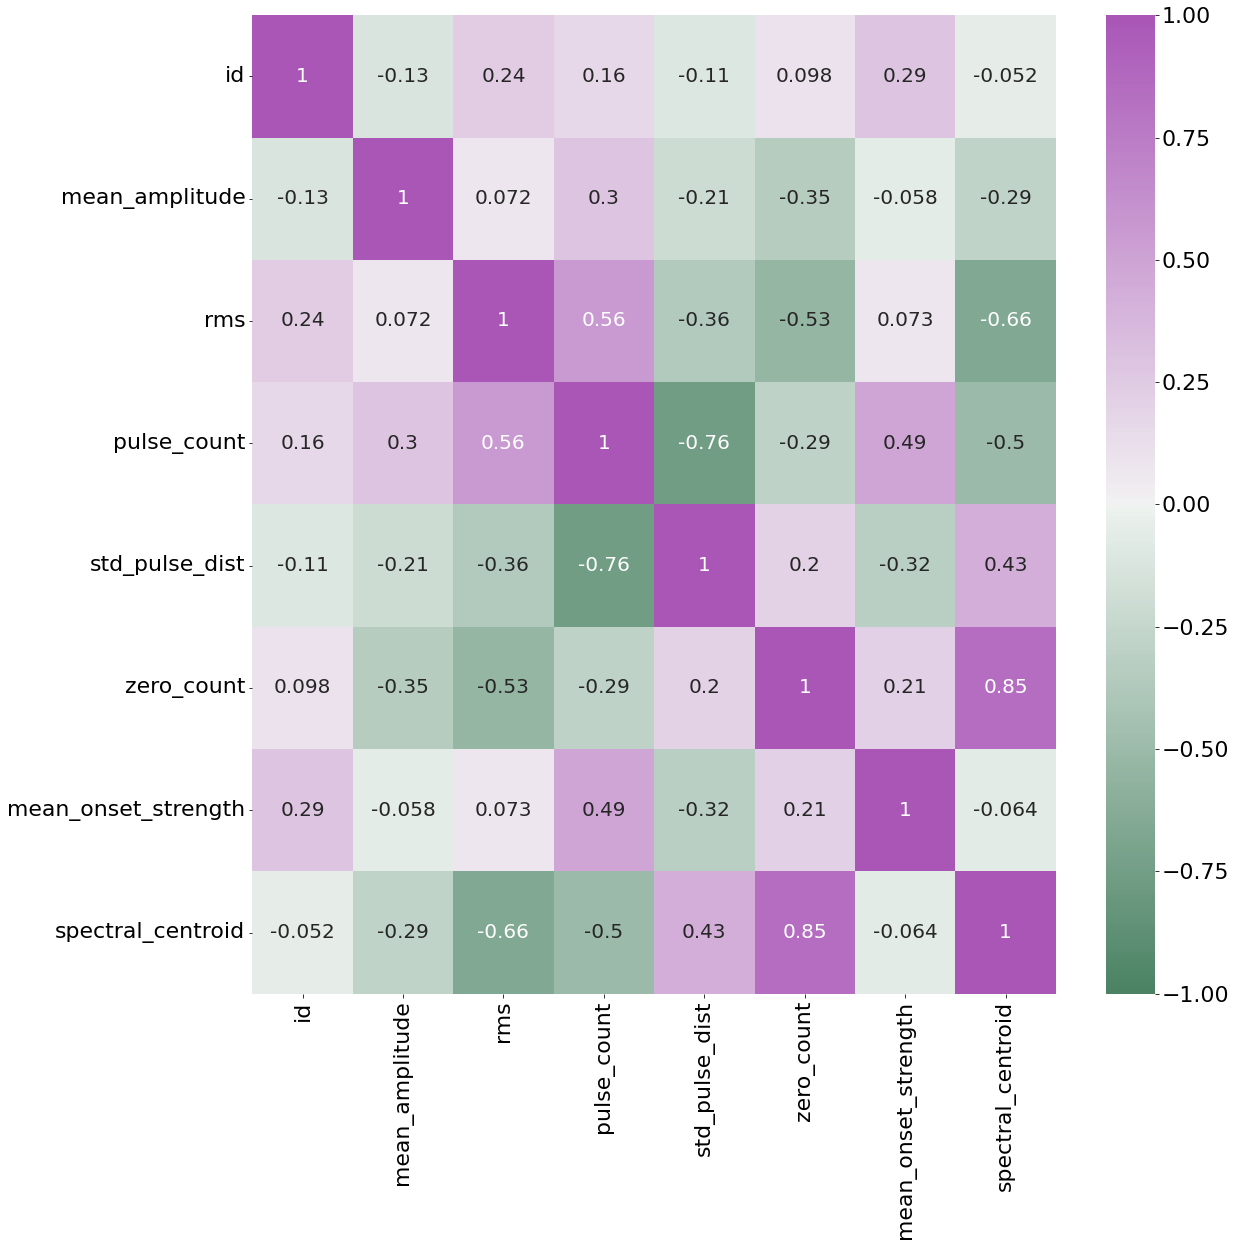

In [6]:
import seaborn as sns

f, ax = plt.subplots(figsize=(18, 18))
corr = df_signal.corr()

# Color palettes:
# sns.color_palette("vlag", as_cmap=True)
# sns.diverging_palette(145, 300, s=60, as_cmap=True)
heatmap = sns.heatmap(corr,
                      mask=np.zeros_like(corr, dtype=bool),
                      cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
                      square=False,
                      annot=True,
                      annot_kws={ "size": 20 },
                      vmin=-1,
                      vmax=1,
                      fmt=".2g",
                      ax=ax)
ax.tick_params(axis='y', rotation=0)
fig = heatmap.get_figure()

In [7]:
import pingouin as pg

df = pg.pairwise_corr(df_signal, method="pearson").round(3)
df = df[df["p-unc"] < 0.05]
df

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
10,mean_amplitude,zero_count,pearson,two-sided,32,-0.351,"[-0.62, -0.0]",0.049,1.416,0.517
13,rms,pulse_count,pearson,two-sided,32,0.559,"[0.26, 0.76]",0.001,43.228,0.931
14,rms,std_pulse_dist,pearson,two-sided,32,-0.364,"[-0.63, -0.02]",0.040,1.641,0.549
15,rms,zero_count,pearson,two-sided,32,-0.535,"[-0.74, -0.23]",0.002,25.495,0.902
17,rms,spectral_centroid,pearson,two-sided,32,-0.657,"[-0.82, -0.4]",0.000,639.46,0.990
18,pulse_count,std_pulse_dist,pearson,two-sided,32,-0.758,"[-0.88, -0.56]",0.000,3.792e+04,1.000
20,pulse_count,mean_onset_strength,pearson,two-sided,32,0.491,"[0.17, 0.72]",0.004,10.855,0.835
21,pulse_count,spectral_centroid,pearson,two-sided,32,-0.503,"[-0.72, -0.19]",0.003,13.569,0.856
24,std_pulse_dist,spectral_centroid,pearson,two-sided,32,0.433,"[0.1, 0.68]",0.013,4.107,0.715
26,zero_count,spectral_centroid,pearson,two-sided,32,0.851,"[0.71, 0.93]",0.000,1.693e+07,1.000
